<h1>Определение перспективного тарифа для телеком-компании</h1>

## Введение

Федеральнй оператор сотовой связи, компания «Мегалайн» предлагает клиентам два тарифных плана: «Смарт» и «Ультра». 
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, 
какой тариф приносит больше денег.
Необходимо выполнить предварительный анализ тарифов на небольшой выборке клиентов. 
Для анализа предоставлены данные 500 пользователей «Мегалайна»: кто они, откуда, 
каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.  

### Цель проекта: 
определить наиболее выгодный тариф для компании.    



### Описание тарифов  

Тариф «Смарт»  
Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 3 рубля  
сообщение: 3 рубля  
1 Гб интернет-трафика: 200 рублей  
  
Тариф «Ультра»  
Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 1 рубль  
сообщение: 1 рубль  
1 Гб интернет-трафика: 150 рублей  

### Описание данных.

Таблица users (информация о пользователях):  
user_id — уникальный идентификатор пользователя  
first_name — имя пользователя  
last_name — фамилия пользователя  
age — возраст пользователя (годы)  
reg_date — дата подключения тарифа (день, месяц, год)  
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
city — город проживания пользователя  
tariff — название тарифного плана  
  
Таблица calls (информация о звонках):  
id — уникальный номер звонка  
call_date — дата звонка  
duration — длительность звонка в минутах  
user_id — идентификатор пользователя, сделавшего звонок  
  
Таблица messages (информация о сообщениях):  
id — уникальный номер сообщения  
message_date — дата сообщения  
user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):  
id — уникальный номер сессии    
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)  
session_date — дата интернет-сессии  
user_id — идентификатор пользователя  
  
Таблица tariffs (информация о тарифах):  
tariff_name — название тарифа  
rub_monthly_fee — ежемесячная абонентская плата в рублях  
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату  
messages_included — количество сообщений в месяц, включённых в абонентскую плату  
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
rub_per_message — стоимость отправки сообщения сверх тарифного пакета  
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

### План работы:
1. Изучие общей информации  
2. Подготовка данных к анализу
3. Анализ данных
4. Проверка гипотез
5. Общий вывод

## Изучение общей информации

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

### Импорт датасетов

In [2]:
calls = pd.read_csv('/home/daniil/Documents/datasets/telecom_ds/calls.csv')
internet= pd.read_csv('/home/daniil/Documents/datasets/telecom_ds/internet.csv')
messages= pd.read_csv('/home/daniil/Documents/datasets/telecom_ds/messages.csv')
tariffs= pd.read_csv('/home/daniil/Documents/datasets/telecom_ds/tariffs.csv')
users= pd.read_csv('/home/daniil/Documents/datasets/telecom_ds/users.csv')

In [3]:
display('Тарифы',tariffs.head(3),
        'Пользователи',users.head(3))

'Тарифы'

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


'Пользователи'

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

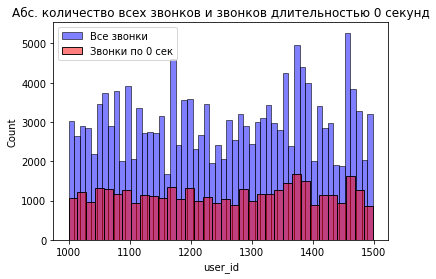

'Доля звонков продолжительностью 0 секунд:24.3%'

In [4]:
#display('Звонки', calls.head(3))
display(calls.info())

plt.title('Абс. количество всех звонков и звонков длительностью 0 секунд')
sns.histplot(data=calls.loc[calls['duration']>0],x='user_id',color='blue',alpha=.5, label='Все звонки')
sns.histplot(data=calls.loc[calls['duration']==0],x='user_id', color='red',alpha=.5, label='Звонки по 0 сек')
plt.legend()
plt.show()

display(f'Доля звонков продолжительностью 0 секунд:{round(calls.loc[calls["duration"]==0,"id"].count()*100/calls.loc[calls["duration"]>0,"id"].count(),2)}%')

In [5]:
#display('СМС',messages.head(3))
display(messages.info())

#sns.histplot(data = messages, x='user_id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

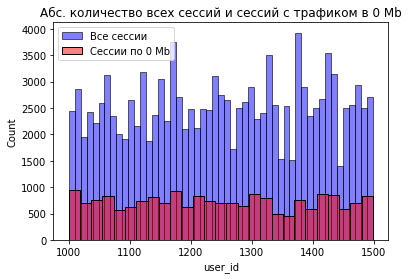

'Доля сессий с трафиком в 0 Mb:15.1%'

In [6]:
#display('Интернет',internet.head(3))
display(internet.info())

#display(internet.loc[internet['mb_used']==0])
plt.title('Абс. количество всех сессий и сессий с трафиком в 0 Mb')
sns.histplot(data=internet.loc[internet['mb_used']>0],x='user_id',color='blue',alpha=.5, label='Все сессии')
sns.histplot(data=internet.loc[internet['mb_used']==0],x='user_id', color='red',alpha=.5, label='Сессии по 0 Mb')
plt.legend()
plt.show()

display(f'Доля сессий с трафиком в 0 Mb:{round(internet.loc[internet["mb_used"]==0,"id"].count()*100/internet.loc[internet["mb_used"]>0,"id"].count(),2)}%')

### Вывод о предоставленных для анализа данных  

Для анализа предоставлены 5 датасетов : Тарифы, Пользователи, Звонки, Сообщения и Интернет.  
Информация таблиц Тарифы и Пользователи соответствует аннотации предоставленных данных.  
По данным таблицы Звонки - за весь период наблюдений совершено 202607 звонка, однако 24,3% из них по тем или иным причинам не состоялись и их длительность равна 0 секунд.  
По данным таблицы Сообщения - за весь период наблюдений отправлено 123036 сообщений.  
По данным таблицы Интернет - за весь период наблюдений состоялось 149396 сессий, однако 15.1% из них по тем или иным причинам не состоялись и их длительность равна 0 Mb.  


## Подготовка данных к анализу

### Преобразование формата даты и времени,проврка на наличие дубликатов

In [7]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])

display('Дубликаты',
    f'calls : {calls.duplicated().sum()}',
    f'internet : {internet.duplicated().sum()}',
    f'messages : {messages.duplicated().sum()}',
    f'tariffs : {tariffs.duplicated().sum()}',
    f'users : {users.duplicated().sum()}')

'Дубликаты'

'calls : 0'

'internet : 0'

'messages : 0'

'tariffs : 0'

'users : 0'

### Подготовка информации о количестве и длительности звонков

In [8]:
calls['month'] = calls['call_date'].dt.month # создаем отдельную графу с месфцем события

calls['duration_ceil'] = np.ceil(calls['duration']) 
#окгругляем длительность звонка до минуты, но сохраняем исходную колонку на всякий случай

new = calls.groupby(['user_id','month']).agg({'id':'count', 'duration_ceil':'sum'}).reset_index().rename(
    columns={'user_id':'user_id','month':'month','id':'count_calls','duration_ceil':'duration_sum'})
display(new.tail(3))

,user_id,month,count_calls,duration_sum
3171,1499,10,68,449.0
3172,1499,11,74,612.0
3173,1499,12,69,492.0


### Объединение информации о звонках, сообщениях и трафике

In [9]:
# звонки + сообщения
messages['month'] = messages['message_date'].dt.month
message_groups = messages.groupby(['user_id','month'])['id'].count().reset_index().rename(columns={'id':'count_sms'})
#display(message_groups)
combine = pd.merge(new,message_groups[['user_id','month','count_sms']], how='outer', on=['user_id','month'])

# звонки, сообщения + интернет
internet['month'] = internet['session_date'].dt.month
new_internet = internet.groupby(['user_id','month']).sum('mb_used').reset_index()
new_internet['gb_used'] = new_internet['mb_used']/1024
combine = pd.merge(combine,new_internet[['user_id','month','mb_used','gb_used']], 
                   how='outer', on=['user_id','month'])

# добавляем к общей таблице информацию о городе пользователя и тарифе
combine = pd.merge(combine,users[['user_id','tariff','city']],how='left',on='user_id')

display(combine.head(3))

,user_id,month,count_calls,duration_sum,count_sms,mb_used,gb_used,tariff,city
0,1000,5,22.0,159.0,22.0,2253.49,2.200674,ultra,Краснодар
1,1000,6,43.0,172.0,60.0,23233.77,22.689229,ultra,Краснодар
2,1000,7,47.0,340.0,75.0,14003.64,13.675430,ultra,Краснодар


### Расчет доходов от абонентской платы и услуг сверх тарифов


In [10]:
# Добавляем к общей таблице информацию о стоимости услуг
combine = combine.rename(columns={'tariff':'tariff_name'})
combine = pd.merge(combine,tariffs, on='tariff_name', how='outer')

display(combine.head(3))

,user_id,month,count_calls,duration_sum,count_sms,mb_used,gb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,2253.49,2.200674,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23233.77,22.689229,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14003.64,13.675430,ultra,Краснодар,1000,30720,3000,1950,150,1,1


In [11]:
# Расчет дохода от предоставленных услуг и объединение полученных результатов с общей таблицей

combine['over_calls']=combine['duration_sum'] - combine['minutes_included'] # расчет дохода от добавочных минут
combine['over_calls']=combine['over_calls'].apply(lambda x: 0 if x < 0 else x)
combine['over_calls']=combine['over_calls']*combine['rub_per_minute']

combine['over_sms']=combine['count_sms'] - combine['messages_included'] # расчет дохода от добавочных смс
combine['over_sms']=combine['over_sms'].apply(lambda x: 0 if x < 0 else x)
combine['over_sms']=combine['over_sms']*combine['rub_per_message']

combine['over_mb']=combine['mb_used'] - combine['mb_per_month_included'] # расчет дохода от добавочных Gb
combine['over_mb']=combine['over_mb'].apply(lambda x: 0 if x < 0 else x)
combine['over_mb'] = np.ceil(combine['over_mb'] / 1024)
combine['over_mb']=combine['over_mb']*combine['rub_per_gb']

combine = combine.replace(to_replace={ # замена пропущенных значений (т.е. невостребованных услуг на "0")
             'over_calls':{np.nan:0}, 
             'over_sms':{np.nan:0},
             'over_mb':{np.nan:0},
                              })

display(combine.tail(3))

,user_id,month,count_calls,duration_sum,count_sms,mb_used,gb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_calls,over_sms,over_mb
3211,1489,10,NaN,NaN,21.0,19559.44,19.101016,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,1000.0
3212,1489,11,NaN,NaN,20.0,17491.56,17.081602,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,600.0
3213,1489,12,NaN,NaN,35.0,17322.51,16.916514,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,400.0


In [12]:
# Расчет общего дохода от пользователя в месяц

combine['sum_month_reven'] = combine['rub_monthly_fee'] + combine['over_calls'] + combine['over_sms'] + combine['over_mb']
display(combine.tail(3))

,user_id,month,count_calls,duration_sum,count_sms,mb_used,gb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_calls,over_sms,over_mb,sum_month_reven
3211,1489,10,NaN,NaN,21.0,19559.44,19.101016,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,1000.0,1550.0
3212,1489,11,NaN,NaN,20.0,17491.56,17.081602,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0
3213,1489,12,NaN,NaN,35.0,17322.51,16.916514,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,400.0,950.0


## Анализ поведения клиентов

### Анализ использования клиентами телефонной связи

'Смарт :'

mean      419.062978
var     35844.189551
std       189.325618
Name: duration_sum, dtype: float64

'Ультра :'

mean      545.451104
var     94203.418396
std       306.925754
Name: duration_sum, dtype: float64

/home/daniil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/daniil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


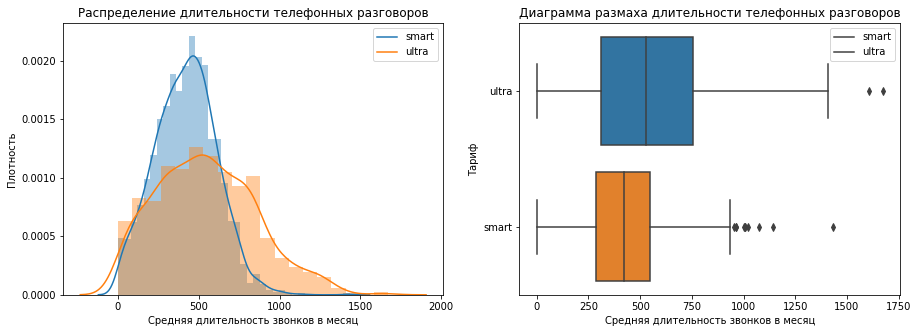

In [13]:
duration_smart = combine.query('tariff_name=="smart"')['duration_sum'].agg(['mean','var','std'])
duration_ultra = combine.query('tariff_name=="ultra"')['duration_sum'].agg(['mean','var','std'])
display('Смарт :', duration_smart)
display('Ультра :', duration_ultra)

fig, axes = plt.subplots(1,2, figsize=(15, 5), sharey=False)
sns.distplot(combine.query('tariff_name=="smart"')['duration_sum'], ax=axes[0], label = 'Смарт')
sns.distplot(combine.query('tariff_name=="ultra"')['duration_sum'], ax=axes[0], label = 'Ультра')
axes[0].set(xlabel ="Средняя длительность звонков в месяц", ylabel = "Плотность", 
            title ='Распределение длительности телефонных разговоров')
axes[0].legend(labels=["smart","ultra"])
sns.boxplot(x ='duration_sum',y = 'tariff_name',data = combine[['tariff_name','duration_sum']].reset_index(), ax=axes[1])
axes[1].set(xlabel ="Средняя длительность звонков в месяц", ylabel = "Тариф", 
            title ='Диаграмма размаха длительности телефонных разговоров')
axes[1].legend(labels=["smart","ultra"])
plt.show()

**Вывод** : 
Распределение длительности звонков по тарифу Смарт имеет распределение близкое к нормальному. Распределение длительности звонков по тарифу Ультра имеет положительную ассиметрию, что свидетельствует о некотором преобладании наблюдений с меньшей  длительностью звонка. Пользователи тарифа Смарт в среднем каждый месяц тратят на разговоры по телефону 419±189 минуты, в то время как пользователи тарифа Ультра 545±306 минуту.

### Анализ использования клиентами смс-сообщений

'Смарт :'

mean     38.716441
var     717.594201
std      26.787949
Name: count_sms, dtype: float64

'Ультра :'

mean      61.161006
var     2109.659183
std       45.931026
Name: count_sms, dtype: float64

/home/daniil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/daniil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


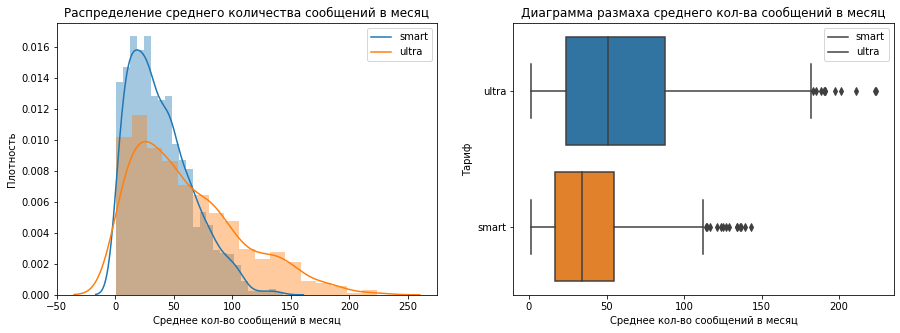

In [14]:
sms_smart = combine.query('tariff_name=="smart"')['count_sms'].agg(['mean','var','std'])
sms_ultra = combine.query('tariff_name=="ultra"')['count_sms'].agg(['mean','var','std'])
display('Смарт :', sms_smart)
display('Ультра :', sms_ultra)

fig, axes = plt.subplots(1,2, figsize=(15, 5), sharey=False)
sns.distplot(combine.query('tariff_name=="smart"')['count_sms'], ax=axes[0], label = 'Смарт')
sns.distplot(combine.query('tariff_name=="ultra"')['count_sms'], ax=axes[0], label = 'Ультра')
axes[0].set(xlabel ="Среднее кол-во сообщений в месяц", ylabel = "Плотность", 
            title ='Распределение среднего количества сообщений в месяц')
axes[0].legend(labels=["smart","ultra"])
sns.boxplot(x ='count_sms',y = 'tariff_name',data = combine[['tariff_name','count_sms']].reset_index(), ax=axes[1])
axes[1].set(xlabel ="Среднее кол-во сообщений в месяц", ylabel = "Тариф", 
            title ='Диаграмма размаха среднего кол-ва сообщений в месяц')
axes[1].legend(labels=["smart","ultra"])
plt.show()

**Вывод**:
Распределения количества сообщений тарифа Смарт и тарифа Ультра имеют положительную ассиметрию, что свидетельствует о преобладании использования меньшего количества сообщений в сравнении со средним количеством. Таким образом пользователи тарифа Смарт обычно отправляют 38±26,7 сообщения в месяц, в то время как пользователи тарифа Ультра используют 61±45,9 сообщения.

### Анализ потребления клиентами интернет-трафика

'Смарт :'

mean    15.835607
var     32.768203
std      5.724352
Name: gb_used, dtype: float64

'Ультра :'

mean    19.207505
var     94.284295
std      9.710010
Name: gb_used, dtype: float64

/home/daniil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/daniil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


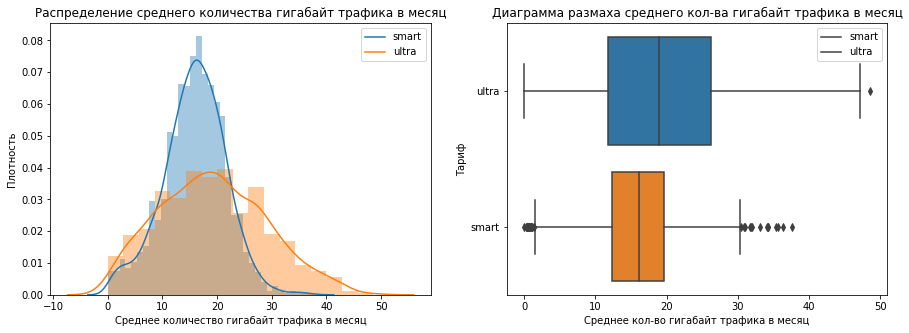

In [15]:
gb_smart = combine.query('tariff_name=="smart"')['gb_used'].agg(['mean','var','std'])
gb_ultra = combine.query('tariff_name=="ultra"')['gb_used'].agg(['mean','var','std'])
display('Смарт :', gb_smart)
display('Ультра :', gb_ultra)

fig, axes = plt.subplots(1,2, figsize=(15, 5), sharey=False)
sns.distplot(combine.query('tariff_name=="smart"')['gb_used'], ax=axes[0], label = 'Смарт')
sns.distplot(combine.query('tariff_name=="ultra"')['gb_used'], ax=axes[0], label = 'Ультра')
axes[0].set(xlabel ="Среднее количество гигабайт трафика в месяц", ylabel = "Плотность", 
            title ='Распределение среднего количества гигабайт трафика в месяц')
axes[0].legend(labels=["smart","ultra"])
sns.boxplot(x ='gb_used',y = 'tariff_name',data = combine[['tariff_name','gb_used']].reset_index(), ax=axes[1])
axes[1].set(xlabel ="Среднее кол-во гигабайт трафика в месяц", ylabel = "Тариф", 
            title ='Диаграмма размаха среднего кол-ва гигабайт трафика в месяц')
axes[1].legend(labels=["smart","ultra"])
plt.show()

**Вывод :**   
Обе выборки характеризуются распределением, близким к нормальному. Таким образом для пользователей тарифа Смарт объем трафика в месяц составил 15,8±5,7 Гб, в то время как для пользователей тарифа Ультра 19,2±9,7 Гб.

### Вывод о поведении клиентов, использующих разные тарифы  

Пакет услуг пользователей тарифа Ультра включает большее количество минут, смс и Гб трафика, чем тарифа Смарт, за большую абонентскую плату. Что, в свою очередь, отражают полученные данные - пользователи тарифа Ультра имеют тенденцию к использованию в среднем большего количества минут разговора, большего количества смс и Гб трафика.

## Проверка гипотез

Задача №1 проверить гипотезу:
-средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;  

Задача №2 проверить гипотезу:
-средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.  

### Количество пользователей и суммарная выручка

In [16]:
# оценка количества пользователей
display(combine.head(3))

display(f'Всего уникальных пользователей : {combine["user_id"].nunique()}')
display(f'Пользователей тарифа Смарт : {combine.loc[combine["tariff_name"]=="smart","user_id"].nunique()}')
display(f'Пользователей тарифа Ультра : {combine.loc[combine["tariff_name"]=="ultra","user_id"].nunique()}')


user_count=combine.groupby(['tariff_name','month'],as_index=False)['user_id'].nunique()
#display(user_count)
pivot_user_count=pd.pivot_table(user_count, index='month', columns='tariff_name', values='user_id').reset_index()
#display(pivot_user_count)

# оценка суммарной выручки
tariff_reven=combine.groupby(['tariff_name','month'],as_index=False)['sum_month_reven'].sum()
pivot_tariff_reven=pd.pivot_table(tariff_reven, index='month', columns='tariff_name', values='sum_month_reven').reset_index()
display(pivot_tariff_reven)

,user_id,month,count_calls,duration_sum,count_sms,mb_used,gb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_calls,over_sms,over_mb,sum_month_reven
0,1000,5,22.0,159.0,22.0,2253.49,2.200674,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,22.689229,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,13.675430,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0


'Всего уникальных пользователей : 498'

'Пользователей тарифа Смарт : 350'

'Пользователей тарифа Ультра : 148'

tariff_name,month,smart,ultra
0,1,24525.0,17550.0
1,2,48001.0,47400.0
2,3,89676.0,74550.0
3,4,107866.0,110100.0
4,5,168849.0,138000.0
5,6,197459.0,171300.0
6,7,246014.0,192750.0
7,8,310340.0,222900.0
8,9,324986.0,232800.0
9,10,401267.0,254100.0


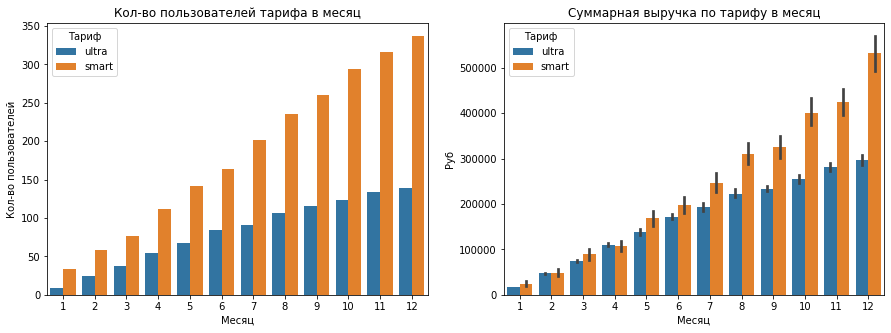

In [17]:
# Графики количества пользователей и выручки
all_us = combine[['tariff_name','month','user_id']]
all_reven = combine[['tariff_name','month','sum_month_reven']]

fig,ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=all_us, x='month',hue='tariff_name', ax=ax[0])
ax[0].set(xlabel ="Месяц", ylabel = "Кол-во пользователей", 
            title ='Кол-во пользователей тарифа в месяц')
ax[0].legend(title='Тариф')
sns.barplot(data=all_reven, x='month',y='sum_month_reven', hue='tariff_name',estimator=sum, ax=ax[1])
ax[1].set(xlabel ="Месяц", ylabel = "Руб", 
            title ='Суммарная выручка по тарифу в месяц')
ax[1].legend(title='Тариф')
plt.show()

,tariff_name,sum_revenue,percent
0,smart,2875351.0,58.508082
1,ultra,2039100.0,41.491918


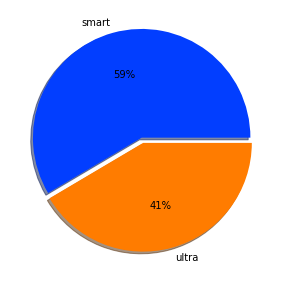

In [18]:
# Доля каждого тарифа от годового дохода
part_reven=pivot_tariff_reven[['smart','ultra']].sum().reset_index()
part_reven.columns=['tariff_name','sum_revenue']
part_reven['percent']= part_reven['sum_revenue']*100/part_reven['sum_revenue'].sum()
display(part_reven)

fig, axes = plt.subplots(1,1, figsize=(5, 5))
explode = [0.05, 0]
colors = sns.color_palette('bright')
plt.pie(part_reven['percent'], labels=part_reven['tariff_name'], colors=colors,
        autopct='%.0f%%', explode=explode, shadow=True)
plt.show()

Вывод: В предлагаемой выборке 498 пользователей, из которых 148 используют тариф "Ультра" и 350 используют тариф "Смарт".  Суммарная выручка за месяц тарифа Смарт превышает выручку тарифа Ультра на протяжении всего года и составляет 58.5 % от общегодовой выручки.

### Задача №1

План:
1. Необходимо проверить - различается ли средняя выручка пользователей тарифов. Для этого установим по умолчанию утверждение о том что выручки равны и попробуем опровергнуть его.   
Следовательно нулевая гипотеза(𝐻0): выручка тарифа Ультра равна выручке тарифа Смарт.  
2. Альтернативная гипотеза (𝐻1) : выручка тарифов Ультра НЕ равна выручке тарифа Смарт. (Гипотеза двусторонняя).
3. Критерий для проверки нулевой гипотезы : критерий Стьюдента для несвязанных выборок.
4. Определить наблюдаемое значение статистики.  
5. Посчитать p-value. Сравнить p-value с фиксированным уровнем значимости (0.05).  
6. Вывод

In [19]:
display(combine.head(3))

set_ultra = combine.loc[combine['tariff_name']=='ultra', 'sum_month_reven']
set_smart = combine.loc[combine['tariff_name']=='smart', 'sum_month_reven']
display(f'Дисперсия в выручке группы тарифа Ультра : {set_ultra.var()}')
display(f'Дисперсия в выручке группы тарифа Ультра : {set_smart.var()}')

alpha = 0.05

task_1 = st.ttest_ind(
    combine.loc[combine['tariff_name']=='ultra', 'sum_month_reven',],
    combine.loc[combine['tariff_name']=='smart', 'sum_month_reven'],
    equal_var = False)

display('p-значение:', task_1.pvalue)

if task_1.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не удалось отвергнуть нулевую гипотезу") 

,user_id,month,count_calls,duration_sum,count_sms,mb_used,gb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_calls,over_sms,over_mb,sum_month_reven
0,1000,5,22.0,159.0,22.0,2253.49,2.200674,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,22.689229,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,13.675430,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0


'Дисперсия в выручке группы тарифа Ультра : 141516.7450786183'

'Дисперсия в выручке группы тарифа Ультра : 669785.7080064242'

'p-значение:'

4.2606313931076085e-250

'Отвергаем нулевую гипотезу'

'Смарт :'

mean      1289.973531
var     669785.708006
std        818.404367
max       6770.000000
Name: sum_month_reven, dtype: float64

'Ультра :'

mean      2070.152284
var     141516.745079
std        376.187114
max       4800.000000
Name: sum_month_reven, dtype: float64

/home/daniil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/daniil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


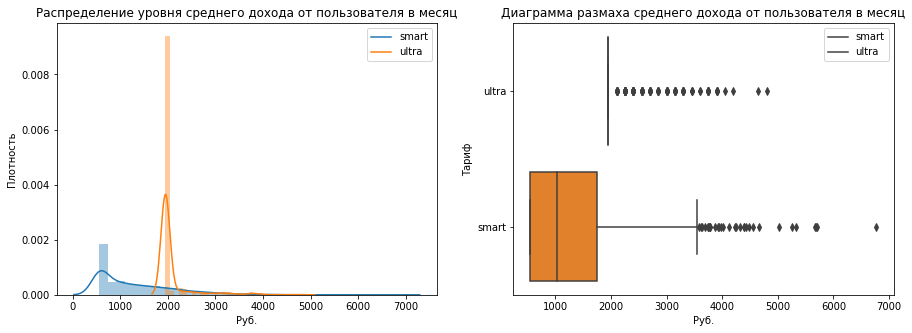

In [20]:
revenue_smart = combine.query('tariff_name=="smart"')['sum_month_reven'].agg(['mean','var','std','max'])
revenue_ultra = combine.query('tariff_name=="ultra"')['sum_month_reven'].agg(['mean','var','std','max'])
display('Смарт :', revenue_smart)
display('Ультра :', revenue_ultra)

fig, axes = plt.subplots(1,2, figsize=(15, 5), sharey=False)
sns.distplot(combine.loc[combine['tariff_name']=='smart', 'sum_month_reven',], ax=axes[0], label = 'Смарт')
sns.distplot(combine.loc[combine['tariff_name']=='ultra', 'sum_month_reven',], ax=axes[0], label = 'Ультра')
axes[0].set(xlabel ="Руб.", ylabel = "Плотность", 
            title ='Распределение уровня среднего дохода от пользователя в месяц')
axes[0].legend(labels=["smart","ultra"])
sns.boxplot(x ='sum_month_reven',y = 'tariff_name',data = combine[['tariff_name','sum_month_reven']].reset_index(), ax=axes[1])
axes[1].set(xlabel ="Руб.", ylabel = "Тариф", 
            title ='Диаграмма размаха среднего дохода от пользователя в месяц')
axes[1].legend(labels=["smart","ultra"])
plt.show()

**Вывод:**
Распределения в обоих группах усечены, т.к. доход от пользователя не может быть меньше абонентской платы, на уровеню которой соответствует наибольшая частота наблюдений в обоих группах. Таким образом, доход от пользователей  наиболее часто распределен на уровне абонентской платы, после чего частота его наблюдений стремительно снижается до максимально зафиксированных значений выручки от пользователя, которая для тарифа Смарт составила 6770 руб, для тарифа Ультра 4800.

### Задача №1 : Вывод  

На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативной.  
Средняя выручка тарифа Ультра не равна средней выручке тарифа Смарт.

### Задача №2

План:

1.  Необходимо проверить - отличается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов. Для этого установим по умолчанию утверждение о том, что выручка пользователей Москвы равна выручке любого другого региона и попробуем опровергнуть этот тезис.  
Следовательно нулевая гипотеза(𝐻0): средняя выручка пользователей из Москвы равна средней выручке пользователей регионов.
2.  Альтернативная гипотеза (𝐻1) : средняя выручка пользователей из Москву НЕ равна выручке пользователей из регионов. (Гипотеза двусторонняя).
3.  Критерий для проверки нулевой гипотезы : критерий Стьюдента для несвязанных выборок.
4.  Определить наблюдаемое значение статистики.
5.  Посчитать p-value. Сравнить p-value с фиксированным уровнем значимости (0.05).
6.  Вывод

In [21]:
 display(f'Дисперсия в выручке пользователей из Москвы : {combine.loc[combine["city"]=="Москва", "sum_month_reven"].var()}')
display(f'Дисперсия в выручке пользователей из регионов : {combine.loc[combine["city"]!="Москва", "sum_month_reven"].var()}')

alpha = 0.05

task_sec = st.ttest_ind(
    combine.loc[combine['city']=='Москва', 'sum_month_reven',],
    combine.loc[combine['city']!='Москва', 'sum_month_reven'],
    equal_var = False)

display('p-значение:', task_sec.pvalue)

if task_sec.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не удалось отвергнуть нулевую гипотезу") 


'Дисперсия в выручке пользователей из Москвы : 565636.467011886'

'Дисперсия в выручке пользователей из регионов : 654137.6285218114'

'p-значение:'

0.5257376663729298

'Не удалось отвергнуть нулевую гипотезу'

### Задача №2 : Вывод  

На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергать нулевую гипотезу в пользу альтернативной. Следовательно, нет оснований считать, что средняя выручка пользователей из Москвы не сопоставима со средней выручкой от пользователей из регионов.

## Общий вывод

Общий вывод  
  
Выполнен анализ тарифных планов компании "Мегалайн" на основании данных выборки из 448 пользователей, из которых 148 используют тариф "Ультра" и 350 используют тариф "Смарт".  
    
Пользователи тарифа Ультра в среднем используют 545±306 минуты разговора, 61±45,9 сообщения и 19,2±9,7 Гб интернет трафика в месяц, для пользователей тарифа Смарт эти показатели составили 419±189, 38±26,7, 15,8±5,7 соответственно. 

Тариф Смарт является более популярным среди пользователей, если в январе этим тарифом пользовались только 34 человека, то к декабрю их количество достигло 337. Прирост пользователей в тарифе Ультра был более медленным - от 9 человек в январе, до 139 в декабре.   

Суммарная выручка увеличивалась по обоим тарифам ежемесячно, таким образом для тарифа Смарт она выросла от 24525.0 руб. в январе до 531965 руб. в декабре. Для тарифа Ультра данные показатели составили 17550 руб. и 297300 руб. соответственно. 

При сравнении анализируемых тарифов, гипотеза о равенстве средних доходов по тарифу Смарт и тарифу Ультра была отвергнута на уровне значимости 5% (уровне доверия 95%, p-value: 4.26e-250), что говорит о наличии статистически значимого отличия между средними месячными доходами от пользователя.  


При сравнительной оценке регионов, гипотеза о равенстве средней выручки пользователей из Москвы и средней выручки пользователей из регионов - на уровне значимости 5% (уровне доверия 95%,p-value: 0.52) отвергнута не была. Следовательно, нет оснований считать, что средняя выручка пользователей из Москвы не сопоставима со средней выручкой от пользователей из регионов.

Таким образом, Тариф Ультра приносит больший средний доход от пользователя в сравнении с тарифом Смарт. Однако, тариф Смарт более популярен среди пользователей чем Ультра, и составляет до 59 % от годовой выручки. 

В качестве путей развития стоит рассмотреть возможности развития маркетингово компании тарифа Ультра, для популяризации его среди пользователей. 